### Following actions should be performed:

##### 1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
##### 2. Check for null and unique values for test and train sets.
##### 3. Apply label encoder.
##### 4. Perform dimensionality reduction.
##### 5. Predict your test_df values using XGBoost.

In [1]:
#importing libraries
import pandas as pd
import numpy as np

In [2]:
#importing train & test datasets
df_train = pd.read_csv(r'D:\DataScience\ML_PROJECTS\MercedesBenz\train\train.csv')
df_test = pd.read_csv(r'D:\DataScience\ML_PROJECTS\MercedesBenz\test\test.csv')

In [3]:
df_train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


### 1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [5]:
df_train.var()

C:\Users\SDS01510\AppData\Local\Temp\ipykernel_6168\3907004805.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train.var()


ID      5.941936e+06
y       1.607667e+02
X10     1.313092e-02
X11     0.000000e+00
X12     6.945713e-02
            ...     
X380    8.014579e-03
X382    7.546747e-03
X383    1.660732e-03
X384    4.750593e-04
X385    1.423823e-03
Length: 370, dtype: float64

In [6]:
(df_train.var()==0).sum()

# Total no.of columns having Zero Variance

C:\Users\SDS01510\AppData\Local\Temp\ipykernel_6168\4073227289.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  (df_train.var()==0).sum()


12

In [7]:
df_train_ZeroVar = df_train.var()[(df_train.var()==0)]

# Storing ZeroVariance columns in a variable

C:\Users\SDS01510\AppData\Local\Temp\ipykernel_6168\1706094619.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train_ZeroVar = df_train.var()[(df_train.var()==0)]


In [8]:
df_train_ZeroVar

X11     0.0
X93     0.0
X107    0.0
X233    0.0
X235    0.0
X268    0.0
X289    0.0
X290    0.0
X293    0.0
X297    0.0
X330    0.0
X347    0.0
dtype: float64

In [9]:
#Removing columns having zero variance

df_train.drop(df_train_ZeroVar.index,axis=1)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


Before dropping the zero variance columns the shape of the dataset were 4209 rows × 378 columns after dropping the columns the shape is 4209 rows × 366 columns
 

### 2. Check for null and unique values for test and train sets.

In [10]:
df_train.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [11]:
df_train.isnull().sum().any()

False

In [12]:
df_train.nunique()

ID      4209
y       2545
X0        47
X1        27
X2        44
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 378, dtype: int64

In [13]:
df_train.nunique().sum()

7673

In [14]:
df_test.isnull().sum()

ID      0
X0      0
X1      0
X2      0
X3      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 377, dtype: int64

In [15]:
df_test.isnull().sum().any()

False

In [16]:
df_test.nunique()

ID      4209
X0        49
X1        27
X2        45
X3         7
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 377, dtype: int64

In [17]:
df_test.nunique().sum()

5141

### 3. Apply label encoder.

### Label Encoder

##### Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form

In [18]:
# importing preprocessing library from sklearn

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [19]:
df_train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


The below are the columns having categorical values which we have to convert them into numerical.

    X0, X1, X2, X3, X4, X5, X6, X8

In [20]:
    # Applying LabelEncoder for the 1st column
    
df_train['X0']=le.fit_transform(df_train['X0'])

In [21]:
df_train['X0'].unique()

array([32, 20, 40,  9, 36, 43, 31, 29, 39, 35, 19, 27, 44, 45,  7,  8, 10,
       46, 37, 15, 12, 42,  5,  0, 26,  6, 25, 13, 24,  1, 22, 14, 30, 38,
       21, 18, 23, 41,  4, 16, 34, 33, 17, 11,  3, 28,  2])

In [22]:
df_train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,8,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,31,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,8,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,9,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [23]:
    # Applying the same for rest of the columns

df_train['X1']=le.fit_transform(df_train['X1'])
df_train['X2']=le.fit_transform(df_train['X2'])
df_train['X3']=le.fit_transform(df_train['X3'])
df_train['X4']=le.fit_transform(df_train['X4'])
df_train['X5']=le.fit_transform(df_train['X5'])
df_train['X6']=le.fit_transform(df_train['X6'])
df_train['X8']=le.fit_transform(df_train['X8'])

In [24]:
df_train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,8,20,16,2,3,0,3,16,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,31,16,40,3,3,0,7,7,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,8,23,38,0,3,0,6,4,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,9,19,25,5,3,0,11,20,...,0,0,0,0,0,0,0,0,0,0


### 4. Perform dimensionality reduction.

### What is Dimensionality Reduction?

##### Dimensionality reduction is a machine learning (ML) or statistical technique of reducing the amount of random variables in a problem by obtaining a set of principal variables.

### Principal Analysis Technique(PCA)

##### Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

#### Standardization

##### Standardization: All the variables should be on the same scale before applying PCA, otherwise, a feature with large values will dominate the result. Below I use StandardScaler in scikit-learn to standardize the dataset’s features onto the unit scale (mean = 0 and variance = 1).

In [25]:
# importing StandardScaler library from sklearn.preprocessing

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [26]:
df_train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,8,20,16,2,3,0,3,16,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,31,16,40,3,3,0,7,7,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,8,23,38,0,3,0,6,4,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,9,19,25,5,3,0,11,20,...,0,0,0,0,0,0,0,0,0,0


In [222]:
X_features = df_train.drop('y',axis=1)
scaler = StandardScaler()
x_scaler = scaler.fit_transform(X_features)

In [263]:
from sklearn.decomposition import PCA

# Fitting df_train Scalared data into PCA

pca = PCA()
pca.fit(x_scaler)

PCA()

In [264]:
x_train_transformed = pca.transform(x_scaler)

Use pca.explained_variance_ratio_ to return a vector of the variance:

In [265]:
x_train_transformed.shape

(4209, 377)

In [266]:
pca_variance = pca.explained_variance_ratio_
pca_variance

array([6.87384486e-02, 5.67283084e-02, 4.52510465e-02, 3.41738590e-02,
       3.25538323e-02, 3.15418578e-02, 2.85471262e-02, 2.11817663e-02,
       1.96863310e-02, 1.77893503e-02, 1.63562978e-02, 1.56009983e-02,
       1.45906030e-02, 1.44564755e-02, 1.34495596e-02, 1.29257331e-02,
       1.24138205e-02, 1.17139363e-02, 1.11912605e-02, 1.07496090e-02,
       9.89891380e-03, 9.67760321e-03, 9.40045751e-03, 9.08605429e-03,
       8.72347187e-03, 8.40759803e-03, 7.92761993e-03, 7.61388789e-03,
       7.34903377e-03, 7.18304967e-03, 6.91226562e-03, 6.75052104e-03,
       6.55057087e-03, 6.46544442e-03, 6.21347862e-03, 6.00246073e-03,
       5.86650100e-03, 5.74454073e-03, 5.62534299e-03, 5.55771245e-03,
       5.50145016e-03, 5.38603020e-03, 5.32448904e-03, 5.23215509e-03,
       5.11352399e-03, 5.01856856e-03, 4.97724151e-03, 4.77275686e-03,
       4.65790330e-03, 4.59136569e-03, 4.46221069e-03, 4.37329823e-03,
       4.31692752e-03, 4.29122103e-03, 4.22545368e-03, 4.18909864e-03,
      

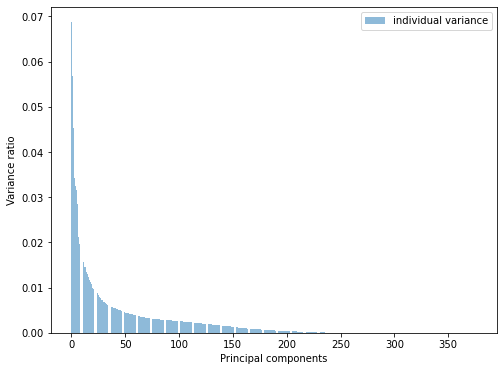

In [267]:
plt.figure(figsize=(8, 6))
plt.bar(range(377),pca_variance,alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

### Performing Label Encoding & PCA on Test Dataset

In [268]:
df_test

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,6,9,17,5,3,1,9,4,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,42,1,8,3,3,1,9,24,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,47,23,17,5,3,1,3,22,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,7,23,17,0,3,1,2,16,0,...,0,0,1,0,0,0,0,0,0,0


In [269]:
   # Applying the LabelEncoder for test data
df_test['X0']=le.fit_transform(df_test['X0'])
df_test['X1']=le.fit_transform(df_test['X1'])
df_test['X2']=le.fit_transform(df_test['X2'])
df_test['X3']=le.fit_transform(df_test['X3'])
df_test['X4']=le.fit_transform(df_test['X4'])
df_test['X5']=le.fit_transform(df_test['X5'])
df_test['X6']=le.fit_transform(df_test['X6'])
df_test['X8']=le.fit_transform(df_test['X8'])

In [270]:
df_test

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,6,9,17,5,3,1,9,4,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,42,1,8,3,3,1,9,24,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,47,23,17,5,3,1,3,22,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,7,23,17,0,3,1,2,16,0,...,0,0,1,0,0,0,0,0,0,0


In [271]:
X_test_features = df_test
scaler = StandardScaler()
x_test_scaler = scaler.fit_transform(X_test_features)

In [272]:
# Fitting df_test Scalared data into PCA
pca = PCA()
pca.fit(x_test_scaler)

PCA()

In [273]:
x_test_transformed = pca.transform(x_test_scaler)

In [274]:
x_test_transformed.shape

(4209, 377)

In [275]:
pca_variance = pca.explained_variance_ratio_
pca_variance

array([6.89508391e-02, 5.44299775e-02, 4.64651536e-02, 3.37812647e-02,
       3.16555569e-02, 3.06957011e-02, 2.73283628e-02, 2.07201833e-02,
       1.85195745e-02, 1.68846102e-02, 1.60982592e-02, 1.59171676e-02,
       1.44672743e-02, 1.34423437e-02, 1.31027722e-02, 1.24030185e-02,
       1.19922894e-02, 1.18111286e-02, 1.09038030e-02, 1.03551392e-02,
       9.99921585e-03, 9.74605088e-03, 9.10341909e-03, 8.98446100e-03,
       8.76511907e-03, 8.32548796e-03, 8.28977377e-03, 7.59055615e-03,
       7.25990867e-03, 7.10069201e-03, 7.00513142e-03, 6.88217593e-03,
       6.71956480e-03, 6.63246658e-03, 6.43821001e-03, 6.19058645e-03,
       6.08051775e-03, 6.00865835e-03, 5.86027769e-03, 5.80366862e-03,
       5.73582513e-03, 5.42497525e-03, 5.35925961e-03, 5.16153366e-03,
       5.10714574e-03, 4.98432264e-03, 4.88553419e-03, 4.80679913e-03,
       4.62787114e-03, 4.56408897e-03, 4.50325894e-03, 4.44349034e-03,
       4.34344020e-03, 4.24062252e-03, 4.16462526e-03, 4.09788901e-03,
      

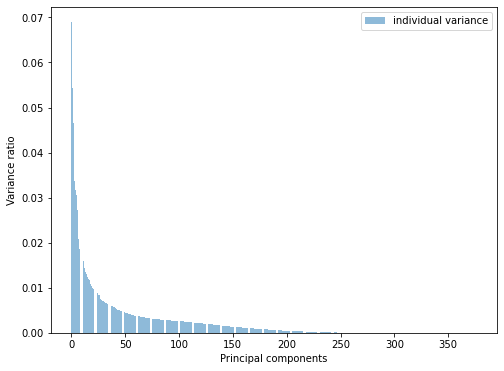

In [276]:
plt.figure(figsize=(8, 6))
plt.bar(range(377),pca_variance,alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

### 5. Predict your test_df values using XGBoost.

#### Train Test & Split

In [277]:
from sklearn.model_selection import train_test_split

X = x_train_transformed
y = df_train.y
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [278]:
from sklearn import svm
from sklearn import model_selection
import xgboost as xgb

In [279]:
model = xgb.XGBRegressor(objective="reg:linear",learning_rate=0.1)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
y_pred

[03:21:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


array([ 90.06379 ,  97.91898 , 104.39425 , ...,  92.45182 ,  96.08137 ,
       115.454765], dtype=float32)

In [280]:
predicteddf = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})
predicteddf

,Actual,Predicted
1073,97.94,90.063789
144,96.41,97.918983
2380,105.83,104.394249
184,79.09,77.972549
2587,108.69,104.463814
...,...,...
2493,115.25,96.246712
3388,88.59,96.256950
3997,92.90,92.451820
383,98.24,96.081367


#### Predicting df_test data using the trained model

In [281]:
model.predict(x_test_transformed)

array([ 88.26879 , 110.06625 ,  89.79384 , ...,  96.623825, 109.035706,
        92.61099 ], dtype=float32)

In [282]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))

Mean Absolute Error: 6.5552886805832635
Mean Squared Error: 114.21069852681315
Root Mean Squared Error: 10.686940559711799
